In [1]:
import pandas as pd

BDD composants et aeronefs sont statiques
BDD log vol et degrations sont maj quotidiennement

In [2]:
aeronefs = pd.read_csv(r"C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\aeronefs_2024-06-02.csv")
composants = pd.read_csv(r"C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\composants_2024-06-02.csv")
degra_06_02 = pd.read_csv(r"C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\degradations_2024-06-02.csv")
log_vols_06_02 = pd.read_csv(r"C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\logs_vols_2024-06-02.csv")

http://sc-e.fr/docs/logs_vols_'
link_degra = 'http://sc-e.fr/docs/degradations_'

In [3]:
degra_06_03 = pd.read_csv(r'http://sc-e.fr/docs/degradations_2024-06-03.csv')
log_vols_06_03 = pd.read_csv(r'http://sc-e.fr/docs/logs_vols_2024-06-03.csv')

In [6]:
aeronefs.shape

(232, 6)

In [7]:
log_vols_06_02.shape

(99, 6)

In [9]:
log_vols_06_03.shape

(77, 6)

In [10]:
composants.shape

(10440, 7)

In [11]:
degra_06_02.shape

(10530, 6)

In [12]:
degra_06_03.shape

(10530, 6)

In [4]:
degra_06_02.head()

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,53.308375,2024-06-01,False
1,D009402,E170_6353,REAE170-E170_6353-1,50.111950,2024-06-01,False
2,D000812,E170_6353,SYSE170-E170_6353-2,16.730575,2024-06-01,False
3,D006665,E170_6353,ORDE170-E170_6353-3,6.653075,2024-06-01,False
4,D001163,E170_6353,AUTE170-E170_6353-4,42.033525,2024-06-01,False


In [5]:
degra_06_03.head()

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,53.308375,2024-06-01,False
1,D009402,E170_6353,REAE170-E170_6353-1,50.111950,2024-06-01,False
2,D000812,E170_6353,SYSE170-E170_6353-2,16.730575,2024-06-01,False
3,D006665,E170_6353,ORDE170-E170_6353-3,6.653075,2024-06-01,False
4,D001163,E170_6353,AUTE170-E170_6353-4,42.033525,2024-06-01,False


In [13]:
composants.head(3)

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514


In [14]:
liste_composants = composants['ref_compo'].tolist()

In [21]:
composants.isna().sum()

ref_compo            0
categorie            0
aero                 0
desc                 0
lifespan             0
taux_usure_actuel    0
cout                 0
dtype: int64

In [16]:
len(liste_composants)

10440

In [19]:
degra_06_03.loc[degra_06_03['compo_concerned'].isin(liste_composants) == False, :]

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement


In [24]:
degra_06_02['doublon'] = degra_06_02.duplicated(subset='compo_concerned', keep='first')

In [31]:
degra_06_02.loc[degra_06_02['doublon'] == True, :]

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,doublon
1845,D008183,E170_5551,REAE170-E170_5551-0,32.09,2023-08-23 00:00:00,False,True
1846,D004196,E170_5551,REAE170-E170_5551-1,40.52,2023-08-23 00:00:00,False,True
1847,D004463,E170_5551,SYSE170-E170_5551-2,1.35,2023-08-23 00:00:00,False,True
1848,D001692,E170_5551,ORDE170-E170_5551-3,34.47,2023-08-23 00:00:00,False,True
1849,D003661,E170_5551,AUTE170-E170_5551-4,23.19,2023-08-23 00:00:00,False,True
...,...,...,...,...,...,...,...
10480,D001482,E170_5551,SYSE170-E170_5551-40,43.96,2023-08-23 00:00:00,False,True
10481,D006878,E170_5551,PORE170-E170_5551-41,9.30,2023-08-23 00:00:00,False,True
10482,D000419,E170_5551,HUBE170-E170_5551-42,40.04,2023-08-23 00:00:00,False,True
10483,D009981,E170_5551,ECLE170-E170_5551-43,56.67,2023-08-23 00:00:00,False,True


In [30]:
degra_06_02.loc[degra_06_02['doublon'] == True, 'compo_concerned'].nunique()

45

In [ ]:
#135 doublons sur composants dont 45 présents plus de 2 fois

In [32]:
liste_compo_dbl = degra_06_02.loc[degra_06_02['doublon'] == True, 'compo_concerned'].tolist()

In [35]:
degra_06_02.loc[degra_06_02['compo_concerned'].isin(liste_compo_dbl), :].sort_values('compo_concerned')

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,doublon
1865,D000073,E170_5551,AILE170-E170_5551-20,43.460000,2023-08-23 00:00:00,False,True
10460,D008842,E170_5551,AILE170-E170_5551-20,43.460000,2023-08-23 00:00:00,False,True
10415,D003913,E170_5551,AILE170-E170_5551-20,43.460000,2023-08-23 00:00:00,False,True
1820,D000369,E170_5551,AILE170-E170_5551-20,44.575544,2024-06-01,False,False
10444,D007717,E170_5551,AUTE170-E170_5551-4,23.190000,2023-08-23 00:00:00,False,True
...,...,...,...,...,...,...,...
10413,D002397,E170_5551,TRAE170-E170_5551-18,42.160000,2023-08-23 00:00:00,False,True
10406,D006204,E170_5551,UNIE170-E170_5551-11,28.330000,2023-08-23 00:00:00,False,True
1856,D002933,E170_5551,UNIE170-E170_5551-11,28.330000,2023-08-23 00:00:00,False,True
1811,D000346,E170_5551,UNIE170-E170_5551-11,29.731744,2024-06-01,False,False


Question pour JO : pourquoi certaine pièces sont présentes plusieurs fois dans le dataset dégradations pour le même jour de mesure et la même usure ? 

In [3]:
degra_06_03.to_csv(r'C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\degra_2024-06_03.csv', index=False)
log_vols_06_03.to_csv(r'C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\logs_vols_2024-06_03.csv', index=False)

In [60]:
#new df avec que les avions en maintenance
avion_maint = aeronefs.loc[aeronefs['en_maintenance'] == True, :]

In [62]:
#liste des ID avion en maintenance
liste_avion_maint = avion_maint['ref_aero'].tolist()

In [237]:
len(liste_avion_maint)

15

In [4]:
aeronefs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ref_aero        232 non-null    object
 1   type_model      232 non-null    object
 2   debut_service   232 non-null    object
 3   last_maint      232 non-null    object
 4   en_maintenance  232 non-null    bool  
 5   end_maint       39 non-null     object
dtypes: bool(1), object(5)
memory usage: 9.4+ KB


In [5]:
aeronefs.isna().sum()

ref_aero            0
type_model          0
debut_service       0
last_maint          0
en_maintenance      0
end_maint         193
dtype: int64

In [6]:
composants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ref_compo          10440 non-null  object 
 1   categorie          10440 non-null  object 
 2   aero               10440 non-null  object 
 3   desc               10440 non-null  object 
 4   lifespan           10440 non-null  int64  
 5   taux_usure_actuel  10440 non-null  float64
 6   cout               10440 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 571.1+ KB


In [7]:
composants.shape

(10440, 7)

In [8]:
composants.isna().sum()

ref_compo            0
categorie            0
aero                 0
desc                 0
lifespan             0
taux_usure_actuel    0
cout                 0
dtype: int64

In [14]:
log_vols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref_vol      53 non-null     object 
 1   aero_linked  53 non-null     object 
 2   jour_vol     53 non-null     object 
 3   time_en_air  53 non-null     float64
 4   sensor_data  53 non-null     object 
 5   etat_voyant  53 non-null     int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ KB


In [15]:
log_vols.shape

(53, 6)

In [16]:
log_vols.isna().sum()

ref_vol        0
aero_linked    0
jour_vol       0
time_en_air    0
sensor_data    0
etat_voyant    0
dtype: int64

In [20]:
#stats descriptives du voyant par avion
log_vols['etat_voyant'].describe()

count    53.000000
mean      0.264151
std       0.524439
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: etat_voyant, dtype: float64

In [21]:
#nb et detail des appareils avec voyant allumés (différent de 0)
log_vols.loc[log_vols['etat_voyant'] > 0, :]

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant
2,V03712533,A350_4582,2023-11-07,3.7,"{'temp': '29.4°C', 'pressure': '852.2 hPa', 'v...",1
14,V06344697,B747_2485,2023-11-07,8.3,"{'temp': '-14.8°C', 'pressure': '989.0 hPa', '...",1
16,V03479117,B777_2456,2023-11-07,5.8,"{'temp': '-12.3°C', 'pressure': '1064.4 hPa', ...",1
20,V07611514,E170_5207,2023-11-07,12.7,"{'temp': '-23.8°C', 'pressure': '960.0 hPa', '...",1
23,V05610202,B767_3269,2023-11-07,1.1,"{'temp': '-17.1°C', 'pressure': '876.8 hPa', '...",1
24,V07886109,A350_4856,2023-11-07,5.5,"{'temp': '-17.2°C', 'pressure': '998.4 hPa', '...",1
29,V00094798,A321_6685,2023-11-07,6.1,"{'temp': '-13.5°C', 'pressure': '841.5 hPa', '...",1
36,V07043690,CRJ900_5738,2023-11-07,8.1,"{'temp': '-18.5°C', 'pressure': '1032.0 hPa', ...",2
37,V09716960,A330_3390,2023-11-07,4.0,"{'temp': '-12.1°C', 'pressure': '972.9 hPa', '...",1
41,V04957815,A330_3862,2023-11-07,3.6,"{'temp': '-12.3°C', 'pressure': '982.1 hPa', '...",1


In [11]:
#composition des données 'sensor'
log_vols.iloc[0, 4]

"{'temp': '-5.7°C', 'pressure': '930.6 hPa', 'vibrations': '3.1163905014858932 m/s²'}"

In [22]:
degradations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ref_deg           10530 non-null  object 
 1   linked_aero       10530 non-null  object 
 2   compo_concerned   10530 non-null  object 
 3   usure_nouvelle    10530 non-null  float64
 4   measure_day       10530 non-null  object 
 5   need_replacement  10530 non-null  bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 421.7+ KB


In [23]:
degradations.shape

(10530, 6)

In [24]:
degradations.isna().sum()

ref_deg             0
linked_aero         0
compo_concerned     0
usure_nouvelle      0
measure_day         0
need_replacement    0
dtype: int64

In [27]:
#a ce jour aucun composant n'est étiquetés comme ayant besoin d'être remplacé malgré le fait que 15 appareils soient en maintenance en cours
degradations.loc[degradations['need_replacement'] == True, :]

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement


Question à poser à Jo : la colonne 'need_remplacement' dans la BDD degradation se met elle à jour après une journée de vol de l'appareil 
OU BIEN s'agit il d'une donnée qui se met à jour selon un taux d'usure programmé (comme par ex : 75%) ? 

In [28]:
degradations['usure_nouvelle'].describe()

count    10530.000000
mean        43.583697
std         17.867596
min          0.360468
25%         28.407234
50%         43.463762
75%         58.912478
max         90.783195
Name: usure_nouvelle, dtype: float64

In [32]:
aeronefs['ref_aero'].nunique()

231

In [39]:
aeronefs['last_maint'] = pd.to_datetime(aeronefs['last_maint'], format='mixed')

In [44]:
aeronefs.loc[aeronefs['last_maint'] > '2024-06-03', :]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


In [34]:
aeronefs.loc[aeronefs['ref_aero'] == 'B757_2518', :]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
93,B757_2518,B757,2006-05-09,2024-06-02,True,2024-06-16 14:13:00


la colonne last_maint ne contient que des dates passées et/ou actuelles mais pas de maintenance préventive

In [58]:
composants['categorie'].value_counts()

categorie
Composants Majeurs        3712
Composants Critiques      3480
Composants Secondaires    3248
Name: count, dtype: int64

In [63]:
liste_avion_maint

['CRJ700_6943',
 'CRJ900_4821',
 'A330_2602',
 'B757_4595',
 'B757_2518',
 'A330_2982',
 'E170_2943',
 'B777_3944',
 'A380_6924',
 'A340_1047',
 'A340_3887',
 'CRJ700_1442',
 'E170_0081',
 'A330_6979',
 'A321_4232']

In [71]:
composants.loc[composants['aero'] == 'E170_0081', :].sort_values('taux_usure_actuel', ascending=False)

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
8187,HUBE170-E170_0081-42,Composants Secondaires,E170_0081,Hublots,68978,62.131746,3593
8160,SYSE170-E170_0081-15,Composants Majeurs,E170_0081,Système hydraulique principal,14811,60.224227,14197
8159,SYSE170-E170_0081-14,Composants Critiques,E170_0081,Système de surveillance du trafic aérien,10023,58.531311,17135
8145,REAE170-E170_0081-0,Composants Critiques,E170_0081,Réacteur gauche,13045,56.313565,15552
8162,TRAE170-E170_0081-17,Composants Majeurs,E170_0081,Train d'atterrissage principal,10389,55.152173,12512
8153,SYSE170-E170_0081-8,Composants Critiques,E170_0081,Système de gestion de carburant,13219,53.593483,18351
8164,SYSE170-E170_0081-19,Composants Majeurs,E170_0081,Système anti-givre,14807,52.303999,13366
8158,SYSE170-E170_0081-13,Composants Critiques,E170_0081,Système d'atterrissage automatique,13537,51.901609,15045
8180,TOIE170-E170_0081-35,Composants Secondaires,E170_0081,Toilettes,13230,51.754110,4801
8146,REAE170-E170_0081-1,Composants Critiques,E170_0081,Réacteur droit,13626,51.016682,17559


In [75]:
log_vols.loc[log_vols['aero_linked'] == 'E170_0081', :]

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant
29,V01361835,E170_0081,2024-06-02,5.7,"'temp': '-2.1°C', 'pressure': '988.5 hPa', 'vi...",1


In [80]:
log_vols.iloc[0,4]

"'temp': '-5.7°C', 'pressure': '930.6 hPa', 'vibrations': '3.1163905014858932 m/s²'"

Après ces 3 blocs on remarques que les avions ont déclenchés un voyant alerte avant d'arriver à 75% d'usure sur les composants

TENTATIVE pour voir corrélation entre données de vols (sensor) et état du voyant

In [74]:
log_vols['sensor_data'] = log_vols['sensor_data'].str.replace('{', '').str.replace('}', '')

In [82]:
sensor = log_vols['sensor_data'].str.split(',', expand=True)

In [83]:
sensor

,0,1,2
0,'temp': '-5.7°C','pressure': '930.6 hPa','vibrations': '3.1163905014858932 m/s²'
1,'temp': '0.9°C','pressure': '950.6 hPa','vibrations': '4.5578253809563725 m/s²'
2,'temp': '-6.2°C','pressure': '975.5 hPa','vibrations': '4.58707061982232 m/s²'
3,'temp': '-25.3°C','pressure': '945.1 hPa','vibrations': '3.287868564197513 m/s²'
4,'temp': '11.1°C','pressure': '931.3 hPa','vibrations': '2.8166257793381355 m/s²'
...,...,...,...
94,'temp': '-15.8°C','pressure': '967.0 hPa','vibrations': '0.5322723736683688 m/s²'
95,'temp': '-6.4°C','pressure': '966.1 hPa','vibrations': '3.600632348965733 m/s²'
96,'temp': '-18.3°C','pressure': '973.3 hPa','vibrations': '2.0827694406743524 m/s²'
97,'temp': '2.8°C','pressure': '949.4 hPa','vibrations': '3.029759269497611 m/s²'


In [89]:
log_vols = pd.merge(log_vols, sensor, left_index=True, right_index=True)

In [122]:
log_vols.head()

,ref_vol,aero_linked,jour_vol,time_en_air,etat_voyant,temperature,pression,vibrations
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116391
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.557825
2,V07933973,B757_2518,2024-06-02,7.7,3,-6.2,975.5,4.587071
3,V02230187,A340_1047,2024-06-02,6.1,1,-25.3,945.1,3.287869
4,V09071213,B757_6806,2024-06-02,4.5,0,11.1,931.3,2.816626


In [104]:
log_vols['temperature'] = log_vols['temperature'].str.replace("'temp':", "")
log_vols['temperature'] = log_vols['temperature'].str.replace("'", "").replace("°C'", "")
log_vols['temperature'] = log_vols['temperature'].str.replace("°C", "")

In [106]:
log_vols['pression'] = log_vols['pression'].str.replace("'pressure':", "").replace("'", "").replace("hPa'", "")

In [116]:
log_vols['pression'] = log_vols['pression'].str.replace("hPa'", "")
log_vols['pression'] = log_vols['pression'].str.replace("'", "")

In [117]:
log_vols['vibrations'] = log_vols['vibrations'].str.replace("'vibrations':", "").str.replace(" m/s²'", "")
log_vols['vibrations'] = log_vols['vibrations'].str.replace("'", "")


In [121]:
log_vols[['temperature', 'pression', 'vibrations']] = log_vols[['temperature', 'pression', 'vibrations']].astype(float)

In [123]:
log_vols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref_vol      99 non-null     object 
 1   aero_linked  99 non-null     object 
 2   jour_vol     99 non-null     object 
 3   time_en_air  99 non-null     float64
 4   etat_voyant  99 non-null     int64  
 5   temperature  99 non-null     float64
 6   pression     99 non-null     float64
 7   vibrations   99 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.3+ KB


In [93]:
log_vols.columns

Index(['ref_vol', 'aero_linked', 'jour_vol', 'time_en_air', 'sensor_data',
       'etat_voyant', 'temperature', 'pression', 'vibrations'],
      dtype='object')

In [91]:
log_vols = log_vols.rename(columns={0:'temperature'})
log_vols = log_vols.rename(columns={1:'pression'})
log_vols = log_vols.rename(columns={2:'vibrations'})

In [95]:
log_vols = log_vols.drop(columns='sensor_data')

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
log_vols_num = log_vols.select_dtypes(include='number')

<Axes: >

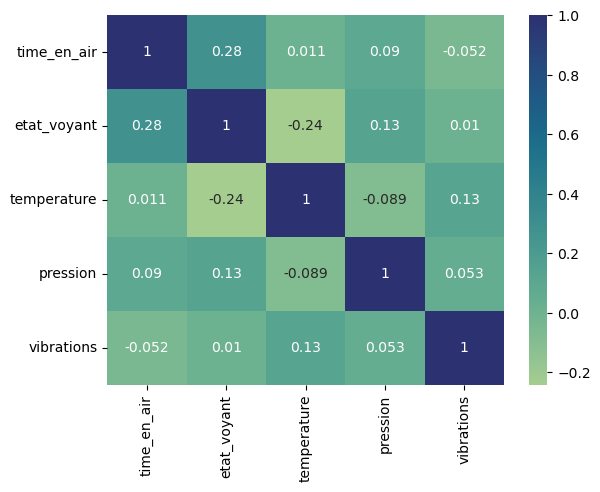

In [133]:
sns.heatmap(log_vols_num.corr(), annot=True, cmap='crest')

Il y a corrélation entre état du voyant et durée de vol (corrélation positive) et état du voyant et température (corrélation négative)

DEBUT DE CODE pour AUTOMATISATION du load des BDD quotidiennes
Format : logs_vols_AAAA-MM-JJ.csv
Format : degradations_AAAA-MM-JJ.csv

In [45]:
from datetime import timedelta, datetime, date

In [165]:
start = '2024-06-02'
end = '2024-07-26'

link_log = 'http://sc-e.fr/docs/logs_vols_'
link_degra = 'http://sc-e.fr/docs/degradations_'

auj = datetime.date.today()
jour = auj.strftime('%Y-%m-%d')
jour

'2024-06-03'

In [166]:
log = pd.read_csv(link_log+jour+".csv")
degra = pd.read_csv(link_degra+jour+".csv")

In [74]:
def maj_dataset_log_vols(jour):
    link_log = 'http://sc-e.fr/docs/logs_vols_'
    log = pd.read_csv(link_log+jour+".csv")
    log.to_csv(r'C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\log_vols_'+ jour +'.csv', index=False)
    return log

In [75]:
def maj_dataset_degra(jour):
    link_degra = 'http://sc-e.fr/docs/degradations_'
    degra = pd.read_csv(link_degra+jour+".csv")
    degra.to_csv(r'C:\Users\MAITE\Wild Code School\SkyAnalytics\BDD\degradations_' + jour + '.csv', index=False)
    return degra

In [76]:
auj = date.today()
jour = auj.strftime('%Y-%m-%d')

In [72]:
auj

datetime.date(2024, 6, 4)

In [77]:
jour

'2024-06-04'

In [79]:
maj_dataset_log_vols(jour)

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant
0,V06783026,A320_6242,2024-06-04,6.2,"{'temp': '-14.7°C', 'pressure': '1009.1 hPa', ...",1
1,V06810954,A380_5199,2024-06-04,2.1,"{'temp': '2.9°C', 'pressure': '1015.8 hPa', 'v...",0
2,V05201226,A350_3122,2024-06-04,7.7,"{'temp': '8.0°C', 'pressure': '934.2 hPa', 'vi...",0
3,V05582404,B747_3165,2024-06-04,8.3,"{'temp': '7.3°C', 'pressure': '999.9 hPa', 'vi...",0
4,V01713095,A350_6452,2024-06-04,9.8,"{'temp': '-11.4°C', 'pressure': '946.7 hPa', '...",0
...,...,...,...,...,...,...
114,V06431541,A340_3962,2024-06-04,5.0,"{'temp': '-7.2°C', 'pressure': '899.8 hPa', 'v...",0
115,V09985804,CRJ700_4386,2024-06-04,4.6,"{'temp': '4.1°C', 'pressure': '942.4 hPa', 'vi...",0
116,V06301893,A380_2017,2024-06-04,3.8,"{'temp': '-1.6°C', 'pressure': '982.2 hPa', 'v...",0
117,V04938486,A320_6678,2024-06-04,2.0,"{'temp': '13.9°C', 'pressure': '890.3 hPa', 'v...",0


In [80]:
maj_dataset_degra(jour)

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,54.208480,2024-06-04,False
1,D009402,E170_6353,REAE170-E170_6353-1,51.052144,2024-06-04,False
2,D000812,E170_6353,SYSE170-E170_6353-2,17.457904,2024-06-04,False
3,D006665,E170_6353,ORDE170-E170_6353-3,7.373504,2024-06-04,False
4,D001163,E170_6353,AUTE170-E170_6353-4,43.057968,2024-06-04,False
...,...,...,...,...,...,...
10525,D006322,CRJ700_2988,SYSCRJ700-CRJ700_2988-40,53.323168,2024-06-02,False
10526,D005497,CRJ700_2988,PORCRJ700-CRJ700_2988-41,16.392552,2024-06-02,False
10527,D005625,CRJ700_2988,HUBCRJ700-CRJ700_2988-42,34.551008,2024-06-02,False
10528,D003657,CRJ700_2988,ECLCRJ700-CRJ700_2988-43,36.706904,2024-06-02,False


In [ ]:
from datetime import timedelta, datetime, date
import time

for i in xrange(0,60) :
    auj = datetime.date.today()
    jour = auj.strftime('%Y-%m-%d')
    maj_dataset_log_vols(jour)
    maj_dataset_degra(jour)
    time.sleep(86400)


In [81]:
#methode time.sleep avec secondes 
#combien de secondes dans 24h ? (60s = 1mn - 60mn = 1h )
60*60*24

86400

voir comment automatiser la fonction en dehors de VS CODE et où stocker les datasets

In [ ]:
début de réflexion sur mise à jour des dataset après dowload quotidien
BDD Aeronefs passer les colonnes 'en maintenance' et 'fin maintenance' en False / NaN à la fin de chaque maintenance (tous les jours)
IF end_maint == auj
ALORS changer la valeur des colonnes 
en_maintenance == True
end_maint == NaN

TENTATIVE DE MERGE RAPIDE ENTRE composants et degradations

In [180]:
merge_test = pd.merge(composants, degradations, how='right', left_on='ref_compo', right_on='compo_concerned')

In [184]:
#merge_test = merge_test.drop(columns='linked_aero')

In [186]:
merge_test['diff_usure'] = merge_test['taux_usure_actuel'] - merge_test['usure_nouvelle']

In [185]:
merge_test

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout,ref_deg,usure_nouvelle,measure_day,need_replacement
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552,D003661,53.308375,2024-06-01,False
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559,D009402,50.111950,2024-06-01,False
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514,D000812,16.730575,2024-06-01,False
3,ORDE170-E170_6353-3,Composants Critiques,E170_6353,Ordinateur de vol,10441,6.653075,16047,D006665,6.653075,2024-06-01,False
4,AUTE170-E170_6353-4,Composants Critiques,E170_6353,Autopilote,14847,42.033525,19362,D001163,42.033525,2024-06-01,False
...,...,...,...,...,...,...,...,...,...,...,...
10705,SYSCRJ700-CRJ700_2988-40,Composants Secondaires,CRJ700_2988,Systèmes d'oxygène d'urgence,13038,53.323168,4745,D006322,53.323168,2024-06-02,False
10706,PORCRJ700-CRJ700_2988-41,Composants Secondaires,CRJ700_2988,Portes passagers,13107,16.392552,3053,D005497,16.392552,2024-06-02,False
10707,HUBCRJ700-CRJ700_2988-42,Composants Secondaires,CRJ700_2988,Hublots,68978,34.551008,3593,D005625,34.551008,2024-06-02,False
10708,ECLCRJ700-CRJ700_2988-43,Composants Secondaires,CRJ700_2988,Éclairage de la cabine,10639,36.706904,4965,D003657,36.706904,2024-06-02,False


In [189]:
composants.shape

(10440, 7)

In [190]:
composants['ref_compo'].nunique()

10395

In [203]:
composants['dbl'] = composants.duplicated(subset=['ref_compo'])

In [221]:
#composants = composants.drop(columns='dbl')

In [198]:
composants.duplicated(subset=['ref_compo']).value_counts()

False    10395
True        45
Name: count, dtype: int64

In [188]:
merge_test.sort_values('diff_usure', ascending=False)

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout,ref_deg,usure_nouvelle,measure_day,need_replacement,diff_usure
10568,PORE170-E170_5551-41,Composants Secondaires,E170_5551,Portes passagers,13107,56.20,3053,D000346,9.300000,2023-08-23 00:00:00,False,46.900000
10658,PORE170-E170_5551-41,Composants Secondaires,E170_5551,Portes passagers,13107,56.20,3053,D006878,9.300000,2023-08-23 00:00:00,False,46.900000
1973,PORE170-E170_5551-41,Composants Secondaires,E170_5551,Portes passagers,13107,56.20,3053,D003449,9.300000,2023-08-23 00:00:00,False,46.900000
1909,SYSE170-E170_5551-9,Composants Critiques,E170_5551,Système d'alerte de proximité au sol (GPWS),10423,46.62,18680,D004625,0.120000,2023-08-23 00:00:00,False,46.500000
10504,SYSE170-E170_5551-9,Composants Critiques,E170_5551,Système d'alerte de proximité au sol (GPWS),10423,46.62,18680,D003005,0.120000,2023-08-23 00:00:00,False,46.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1863,SIEE170-E170_5551-31,Composants Secondaires,E170_5551,Siège pilote,12106,9.44,2151,D005017,50.763236,2024-06-01,False,-41.323236
10558,SYSE170-E170_5551-36,Composants Majeurs,E170_5551,Système de conditionnement d'air,10343,6.45,13453,D008043,56.630000,2023-08-23 00:00:00,False,-50.180000
1963,SYSE170-E170_5551-36,Composants Majeurs,E170_5551,Système de conditionnement d'air,10343,6.45,13453,D000419,56.630000,2023-08-23 00:00:00,False,-50.180000
10648,SYSE170-E170_5551-36,Composants Majeurs,E170_5551,Système de conditionnement d'air,10343,6.45,13453,D006241,56.630000,2023-08-23 00:00:00,False,-50.180000


A VOIR AVEC JO : pourquoi le cout d'un composant identique à un autre composant ET sur le même avion (ex réacteur droit et gauche) n'a pas le même cout NI le même lifespan.
Selon nous cout = prix pour remplacement à neuf de la pièce 
donc différent de valeur nette comptable (tient compte de l'amortissement et de la degradation)

In [227]:
composants.duplicated().sum()

0

In [229]:
composants.duplicated(subset=['ref_compo','categorie','aero','desc','lifespan','cout']).value_counts()

False    10395
True        45
Name: count, dtype: int64

In [235]:
composants[composants.duplicated(subset=['ref_compo','categorie','aero','desc','lifespan','taux_usure_actuel'], keep='first')]

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
